# Feature Manipulation in Pandas

This is a companion notebook for videos part of unit 2 for the data mining course.

Here let's look at a different dataset that will allow us to really dive into some meaningful statistics. This data set is publically available, but is also part of a Kaggle competition.

You can get the data from here: https://www.kaggle.com/c/titanic-gettingStarted 

There are lots of iPython notebooks for looking at the Titanic data. Check them out and see you like any!

In [44]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("9xoqXVjBEF8")

In [45]:
# load the Titantic dataset
import pandas as pd
import numpy as np

df = pd.read_csv('data/titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
print (df.dtypes)
print (df.info())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [48]:
# the percentage of individuals that died on the titanic
len(df[df.Survived==0])/len(df)*100.0

61.61616161616161

In [49]:
# Let's aggregate by class and count survival rates
df_grouped = df.groupby(by='Pclass')
print (df_grouped.Survived.sum())
print ('---------------------------------------')
print (df_grouped.Survived.count())
print ('---------------------------------------')
print (df_grouped.Survived.sum() / df_grouped.Survived.count())

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Feature Discretization

In [50]:
# let's break up the age variable
df['age_range'] = pd.cut(df.Age,[0,16,65,1e6],3,labels=['child','adult','senior']) # this creates a new variable
df.age_range.describe()

count       714
unique        3
top       adult
freq        606
Name: age_range, dtype: object

In [51]:
# now let's group with the new variable
df_grouped = df.groupby(by=['Pclass','age_range'])
print ("Percentage of survivors in each group:")
print (df_grouped.Survived.sum() / df_grouped.Survived.count()* 100.0)

Percentage of survivors in each group:
Pclass  age_range
1       child        88.888889
        adult        65.317919
        senior       25.000000
2       child        90.476190
        adult        42.666667
        senior        0.000000
3       child        40.000000
        adult        20.141343
        senior        0.000000
Name: Survived, dtype: float64


In [52]:
# Let's clean the dataset a little before moving on

# 1. Remove attributes that just aren't useful for us
for col in ['PassengerId','Name','Cabin','Ticket']:
    if col in df:
        del df[col]
        
# 2. Impute some missing values, grouped by their Pclass and SibSp numbers
df_grouped = df.groupby(by=['Pclass','SibSp'])
print (df_grouped.describe())

                Age                                                         \
              count       mean        std    min    25%   50%    75%   max   
Pclass SibSp                                                                 
1      0      113.0  39.181416  14.844591   4.00  28.00  37.0  50.00  80.0   
       1       65.0  37.414154  14.690355   0.92  28.00  38.0  49.00  70.0   
       2        5.0  37.200000  16.513631  18.00  21.00  44.0  50.00  53.0   
       3        3.0  22.000000   2.645751  19.00  21.00  23.0  23.50  24.0   
2      0      109.0  31.934220  13.486824   0.83  23.00  30.0  39.00  70.0   
       1       55.0  27.363636  14.609811   0.67  21.50  29.0  35.00  60.0   
       2        8.0  19.125000  10.776131   1.00  16.75  23.5  24.00  32.0   
       3        1.0  30.000000        NaN  30.00  30.00  30.0  30.00  30.0   
3      0      249.0  27.630201  11.501377   0.42  20.00  26.0  33.00  74.0   
       1       63.0  24.912698  11.439018   1.00  17.50  25.0  3

In [53]:
# now use this grouping to fill the data set in each group, then transform back
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df_imputed[['Pclass','SibSp','Sex','Embarked']] = df[['Pclass','SibSp','Sex','Embarked']]

print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Age         884 non-null float64
Parch       891 non-null int64
Fare        891 non-null float64
Pclass      891 non-null int64
SibSp       891 non-null int64
Sex         891 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


/Users/davidstroud/anaconda3/envs/snakes/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:990: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [54]:
# 3. Computed discrete features again now with the newest values
df_imputed['age_range'] = pd.cut(df_imputed.Age,[0,16,65,1e6],3,labels=['child','adult','senior']) # this creates a new variable

print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Age          884 non-null float64
Parch        891 non-null int64
Fare         891 non-null float64
Pclass       891 non-null int64
SibSp        891 non-null int64
Sex          891 non-null object
Embarked     889 non-null object
age_range    884 non-null category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB
None


In [55]:
# 4. Drop the rows that still have missing values after grouped imputation
df_imputed.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed = df_imputed[['Survived','Age','age_range','Sex','Parch','SibSp','Pclass','Fare','Embarked']]

print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 9 columns):
Survived     882 non-null int64
Age          882 non-null float64
age_range    882 non-null category
Sex          882 non-null object
Parch        882 non-null int64
SibSp        882 non-null int64
Pclass       882 non-null int64
Fare         882 non-null float64
Embarked     882 non-null object
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 63.0+ KB
None


In [56]:
# did the statistics of the survival group change much? Let's check by repeating the previous grouped calculations
df_grouped = df_imputed.groupby(by=['Pclass', 'age_range'])
print ("Percentage of survivors in each group, with imputed values:")
print (df_grouped.Survived.sum() / df_grouped.Survived.count() * 100.0)

Percentage of survivors in each group, with imputed values:
Pclass  age_range
1       child        88.888889
        adult        62.189055
        senior       25.000000
2       child        90.476190
        adult        42.236025
        senior        0.000000
3       child        37.837838
        adult        22.303922
        senior        0.000000
Name: Survived, dtype: float64


In [57]:
df_sub = df_imputed[['Survived', 'Age', 'Pclass', 'Fare']]
df_normalized = (df_sub - df_sub.min()) / (df_sub.max() - df_sub.min()) 

print (df_normalized.describe())

         Survived         Age      Pclass        Fare
count  882.000000  882.000000  882.000000  882.000000
mean     0.385488    0.362094    0.653061    0.062068
std      0.486986    0.166808    0.417871    0.097168
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.271174    0.500000    0.015412
50%      0.000000    0.321438    1.000000    0.028213
75%      1.000000    0.459663    1.000000    0.059532
max      1.000000    1.000000    1.000000    1.000000


In [58]:
from sklearn.preprocessing import StandardScaler

df_matrix = df_imputed[['Survived','Age', 'Pclass', 'Fare']].values

s_obj = StandardScaler()
df_matrix_norm = s_obj.fit_transform(df_matrix)

print (np.std(df_matrix_norm, axis=0)) # unit std
print (np.mean(df_matrix_norm, axis=0)) # zero mean

[ 1.  1.  1.  1.]
[  6.04203007e-18   1.53064762e-16  -1.89316942e-16  -6.04203007e-17]


# One Hot Encoding with Pandas

In [59]:
# using one hot encoding representations
tmpdf = pd.get_dummies(df_imputed['Sex'],prefix='gender')
tmpdf.head()

,gender_female,gender_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [60]:
# using one hot encoding representations
tmpdf = pd.get_dummies(df_imputed['Pclass'],prefix='class')
tmpdf.head()

,class_1,class_2,class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


# Visualization in Python with Pandas, Matplotlib, and Others

In [61]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

## Visualizing the dataset

Pandas has plenty of plotting abilities built in. Let's take a look at a few of the different graphing capabilities of Pandas with only matplotlib. Afterward, we can make the visualizations more beautiful.

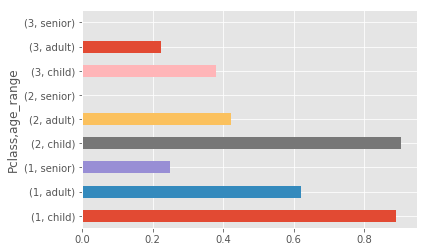

In [62]:
# Start by just plotting what we previously grouped!
plt.style.use('ggplot')

df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()
ax = survival_rate.plot(kind='barh')

In [63]:
# the cross tab operator provides an easy way to get these numbers
survival = pd.crosstab([df_imputed['Pclass'],df_imputed['age_range']],
                      df_imputed.Survived.astype(bool))
print (survival)

Survived          False  True 
Pclass age_range              
1      child          1      8
       adult         76    125
       senior         3      1
2      child          2     19
       adult         93     68
       senior         2      0
3      child         46     28
       adult        317     91
       senior         2      0


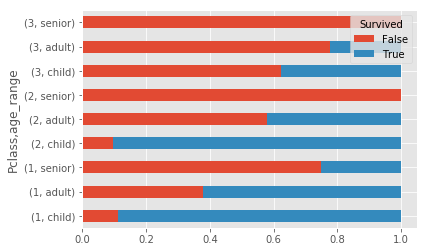

In [64]:
survival_rate = survival.div(survival.sum(1).astype(float),
                            axis=0) # normalize the value

# print survival rate
survival_rate.plot(kind='barh',
                  stacked=True)

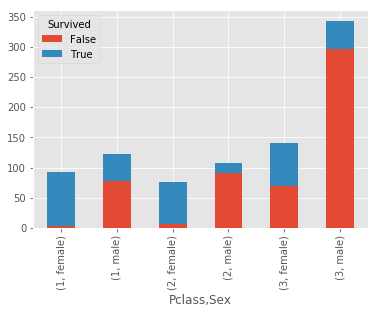

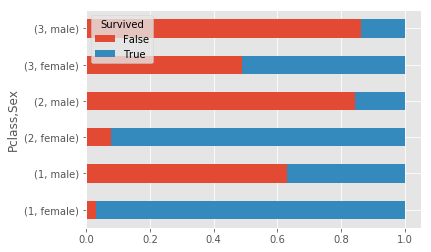

In [65]:
# cross tabulate example from http://nbviewer.ipython.org/gist/fonnesbeck/5850463#
survival_counts = pd.crosstab([df_imputed['Pclass'], df_imputed['Sex']],
                             df_imputed.Survived.astype(bool))
survival_counts.plot(kind='bar',
                    stacked=True)

# divide the counts to get the rates
survival_rate = survival_counts.div(survival_counts.sum(1).astype(float),axis=0)
survival_rate.plot(kind='barh',
                  stacked=True)


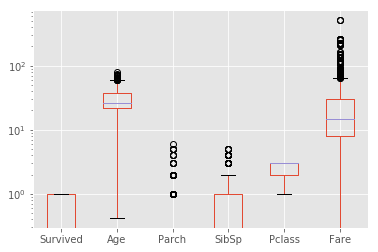

In [66]:
# pandas has some really powerful extensions from matplotlib for scientific computing
ax = df_imputed.boxplot()
ax.set_yscale('log')

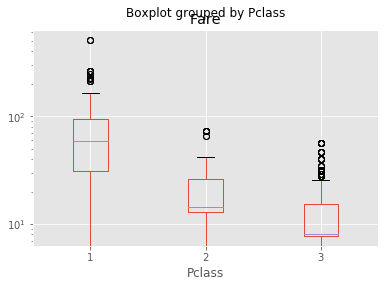

In [67]:
ax = df_imputed.boxplot(column='Fare', by= 'Pclass')
ax.set_yscale('log')

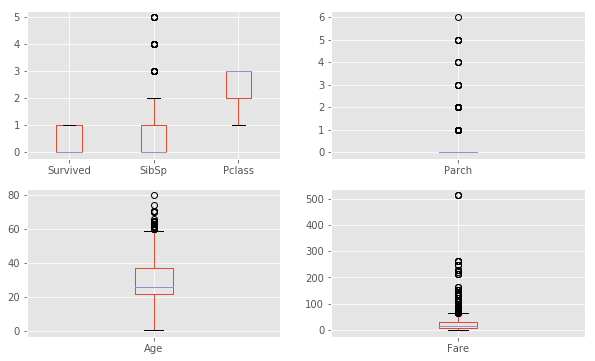

In [68]:
# let's look at the boxplots seperately
var_to_plot_seperate = [['Survived', 'SibSp', 'Pclass'],
                       ["Parch"],
                       ['Age'],
                       ['Fare']]
plt.figure(figsize=(10, 6))

for index, plot_vars in enumerate(var_to_plot_seperate):
    plt.subplot(len(var_to_plot_seperate)/2,
                   2,
                   index+1)
    ax = df_imputed.boxplot(column=plot_vars)

plt.show()

<Figure size 288x288 with 0 Axes>

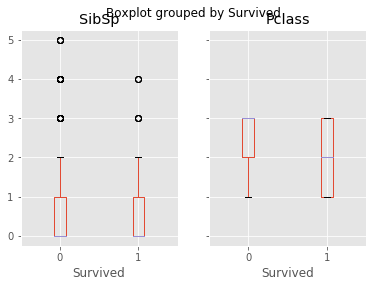

<Figure size 288x288 with 0 Axes>

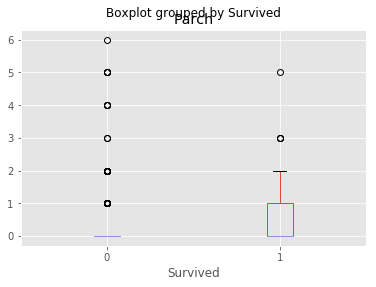

<Figure size 288x288 with 0 Axes>

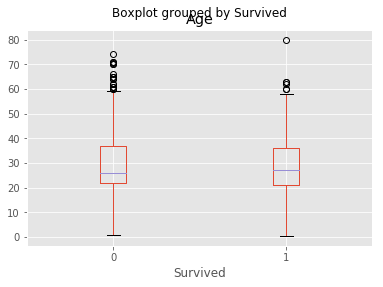

<Figure size 288x288 with 0 Axes>

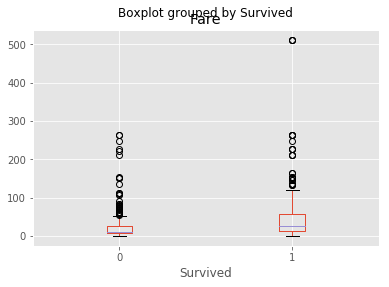

In [69]:
# lets look at the boxplots separately
# these are examples of POOR plotting 
#   using integers on a boxplot in this case doesnt reveal much

vars_to_plot_separate = [['SibSp','Pclass'],
                         ['Parch'],
                         ['Age'],
                         ['Fare']]

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.figure(figsize=(4, 4))
    ax = df_imputed.boxplot(column=plot_vars, by='Survived')
plt.show()

/Users/davidstroud/anaconda3/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


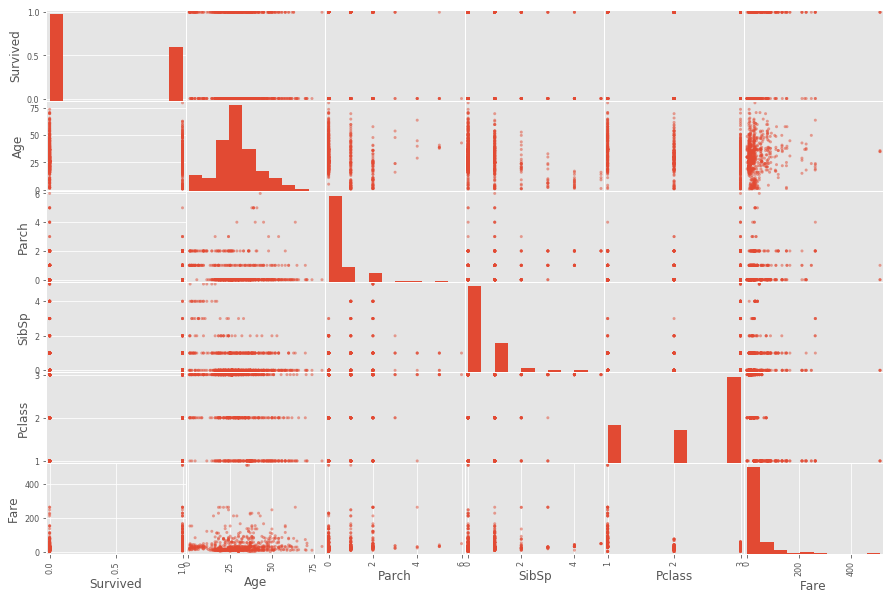

In [70]:
from pandas.tools.plotting import scatter_matrix

ax = scatter_matrix(df_imputed,figsize=(15, 10))

/Users/davidstroud/anaconda3/envs/snakes/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/davidstroud/anaconda3/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
/Users/davidstroud/anaconda3/envs/snakes/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


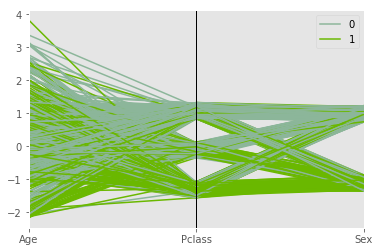

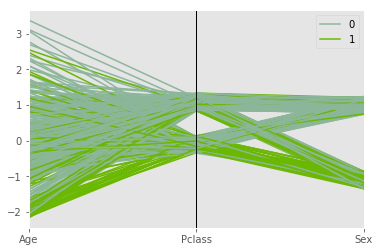

In [71]:
from pandas.tools.plotting import parallel_coordinates

# this plot is more meaningful when values are normalized
# parallel_coordinates(df_imputed[['Survived','Age','Pclass','Fare']],'Survived')

df_sub = df_imputed[['Survived','Age','Pclass','Sex']]
df_sub.Sex = df_sub.Sex=='male' 

df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_normalized.Survived = df_sub.Survived

# add some jitter to the Pclass and Sex variables
df_normalized.Pclass = df_normalized.Pclass+np.random.rand(*df_normalized.Pclass.shape)/2
df_normalized.Sex = df_normalized.Sex+np.random.rand(*df_normalized.Sex.shape)/2


parallel_coordinates(df_normalized,'Survived')

plt.figure()
parallel_coordinates(df_normalized[df_sub.Pclass>1],'Survived')



In [72]:
# from pandas.tools.plotting import andrews_curves

# # using frequency analysis to breakdwon the prediction
# plt.figure(figsize=(20,6))
# andrews_curves(df_imputed,"Survived")

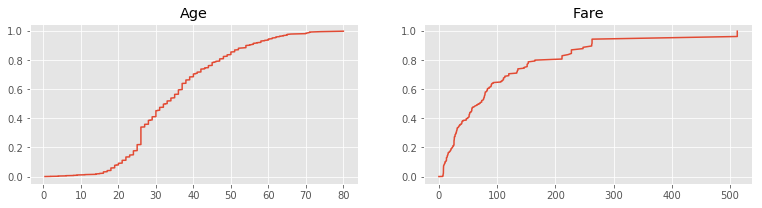

In [73]:
# import numpy as np

# make empirical CDFs
plt.figure(figsize=(20,10))
for fi,feature in enumerate(['Age','Fare']):
    plt.subplot(3,3,fi+1)
    x_ax = np.sort(df_imputed[feature])
    y_ax = np.cumsum(x_ax)
    y_ax = y_ax/np.max(y_ax)
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

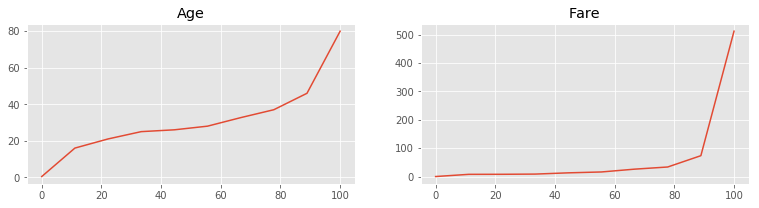

In [74]:
# make percentile plots
plt.figure(figsize=(20,10))
for fi,feature in enumerate(['Age','Fare']):
    plt.subplot(3,3,fi+1)
    x_ax = np.linspace(0,100,10)
    y_ax = [np.percentile(df_imputed[feature], x_val) for x_val in x_ax]
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

# Simplifying with Seaborn
Now let's take a look at what we get from our previous import statement: 
+ `import seaborn as sns` 


In [75]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# now try plotting some of the previous plots, way more visually appealing!!

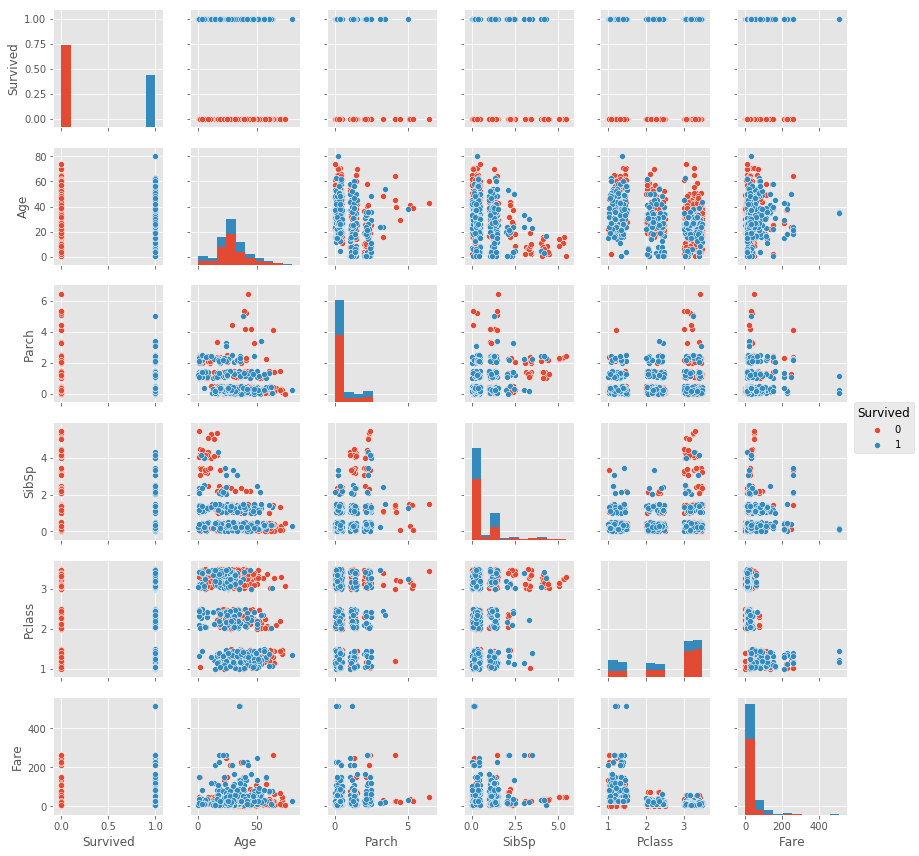

In [76]:
df_imputed_jitter = df_imputed.copy()
df_imputed_jitter[['Parch','SibSp','Pclass']] = df_imputed_jitter[['Parch','SibSp','Pclass']].values + np.random.rand(len(df_imputed_jitter),3)/2 
sns.pairplot(df_imputed_jitter, hue="Survived", size=2)